In [1]:
# Imports 
import os
import tensorflow as tf

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
# Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True)
from google.colab import drive
# drive.mount('/content/plant_pathology_data', force_remount=True)
drive.mount('/content/plant_pathology_data')

# /content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images"

Drive already mounted at /content/plant_pathology_data; to attempt to forcibly remount, call drive.mount("/content/plant_pathology_data", force_remount=True).


In [3]:
train_image_path = "/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/train_images"
resized_train_image_path = "/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images"

def loadImages(path):
    '''
      Put files into lists and return them as one list with all images in the folder
    '''
    image_files = sorted([
                          os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpg')
                        ])
    return image_files

train_image_files = loadImages(train_image_path)
resized_image_files = loadImages(resized_train_image_path)
# rtrain images ran 1 minute 26 seconds 

In [4]:
main_labels = pd.Series(
    ['scab',
    'healthy',
    'frog_eye_leaf_spot',
    'rust',
    'complex',
    'powdery_mildew'],
    dtype='category'
)

In [5]:
 scab_image_paths = [
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8002cb321f8bfcdf.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80070f7fb5e2ccaa.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80077517781fb94f.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80230a9a3f7a9f6b.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80261f473eafb92c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802962dc3ecdbb8d.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802969daaddbbc8c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802b34badefa2ed0.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802f4bbd295063fe.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803270d4d78faeba.jpg'
]
 
 healthy_image_paths = [
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/800113bb65efe69e.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/800edef467d27c15.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/801d6dcd96e48ebc.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8021b94d437eb7d3.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8023c3f31f875b6c.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802b59956a7aa5e7.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80331e0efb74dd62.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803bcb65f486e39a.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803e60cf3c64e1fe.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/804e1eda54919fbb.jpg'
]

frog_eye_leaf_spot_image_paths = [
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8002cb321f8bfcdf.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80273091d9e9bddb.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803f621b4757e0af.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/806878cdcb8df99a.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/806b46cce99acedc.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8072861fcb8fb46d.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80729ba9dd175cf0.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80769797ce42f658.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/807dcd0bd2b0b6b9.jpg',
  '/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/807f3b90f2a315da.jpg'
]

rust_image_paths = [
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/800f85dc5f407aef.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8030a3a79fca6abb.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803b586d7db3ca16.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803f899768b5b789.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/807947b90eb77856.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/808c7cabba2f9572.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/808f897fa9e2adb0.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80933fcc6a673636.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/809c3fc2796fd84a.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80b0c5d6d7ce83dc.jpg'
]

complex_image_paths = [
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8002cb321f8bfcdf.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/800cbf0ff87721f8.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/801f78399a44e7af.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802291cee9fec9f4.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/803e3bd17a16e65c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8052c7272b3b3f5c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8054952d7a8bacbf.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/806878cdcb8df99a.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8081cf8f63250ff7.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/808734da3f595b59.jpg'
]

powdery_mildew_image_paths = [
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/802f7439ec1ef0cd.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80563fc5e3ca1b3c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/806d7d0df8cae3c2.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/8075fbf90600e5fa.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/808d2f39f597f406.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/809495769b64f3b5.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80bc7d353e163e85.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80bcfd9f60f06307.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80efccd95ab1256c.jpg',
	'/content/plant_pathology_data/MyDrive/Colab Notebooks/plant_pathology_data/resized_train_images/80f8cdc9854f756a.jpg'
]

In [6]:

def concat_images(path):
  '''
    This is to create a list of images for plotting. 
    It has to be converted to a numpy ndarray so it can be ravel-d and plotted 
  '''
  new_list = []  
  for image_file in path:
    new_image = cv.imread(image_file)
    new_list.append(np.asarray(new_image))
    concatenated_images = np.concatenate(new_list)
  
  return concatenated_images


In [7]:
scab_concatenated_images = concat_images(scab_image_paths)

In [8]:
healthy_concatenated_images = concat_images(healthy_image_paths)

In [9]:
frog_eye_leaf_spot_concatenated_images = concat_images(frog_eye_leaf_spot_image_paths)

In [10]:
rust_concatenated_images = concat_images(rust_image_paths)

In [11]:
complex_concatenated_images = concat_images(complex_image_paths)

In [12]:
powdery_mildew_concatenated_images = concat_images(powdery_mildew_image_paths)

# Playing with Seaborn joint plot on the resized images 

In [13]:
print(len(healthy_concatenated_images[0]))
print(len(healthy_concatenated_images))

300
2050


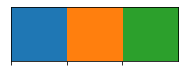

In [14]:
sns.palplot(sns.color_palette("tab10", n_colors=3))

# Healthy concatenated images 
* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

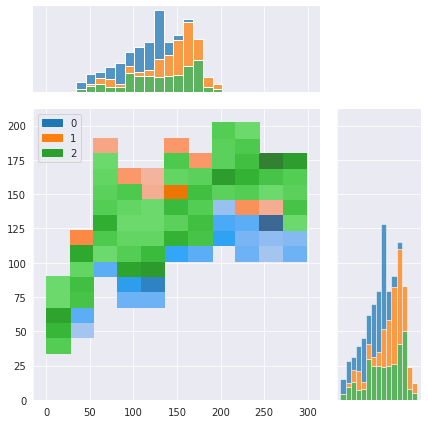

In [15]:

df_concat = pd.DataFrame(healthy_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

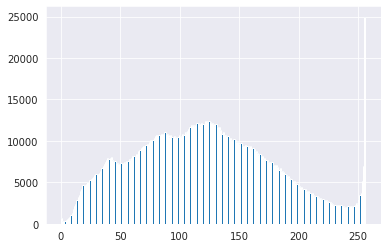

In [21]:
plt.hist(healthy_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

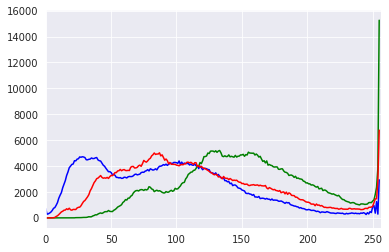

In [22]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([healthy_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# Scab concatenated images 
* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

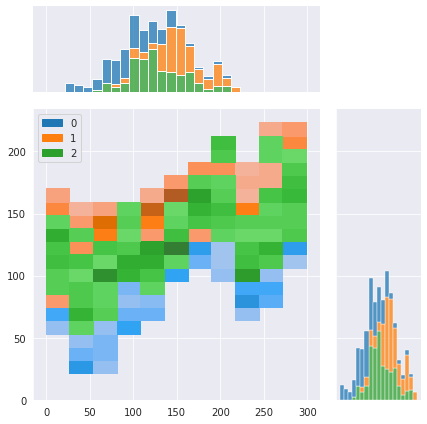

In [16]:
df_concat = pd.DataFrame(scab_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

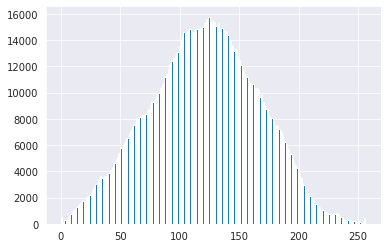

In [23]:
plt.hist(scab_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

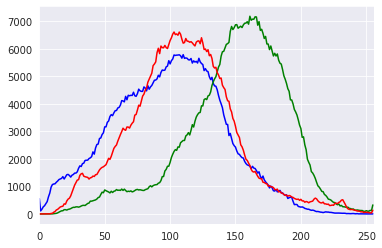

In [24]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([scab_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Frog Eye Leaf Spot concatenated images 
* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

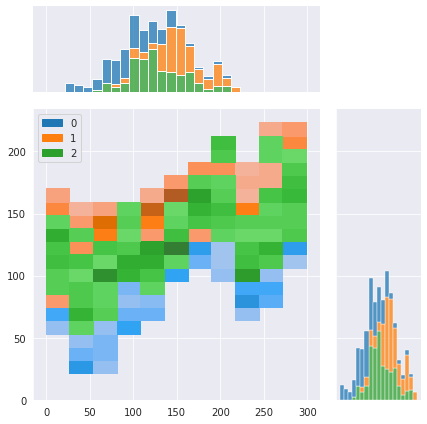

In [17]:

df_concat = pd.DataFrame(frog_eye_leaf_spot_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

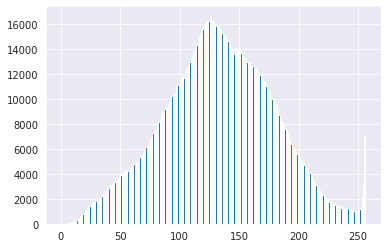

In [25]:
plt.hist(frog_eye_leaf_spot_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

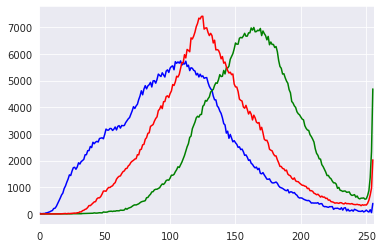

In [26]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([frog_eye_leaf_spot_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# Rust concatenated images 
* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

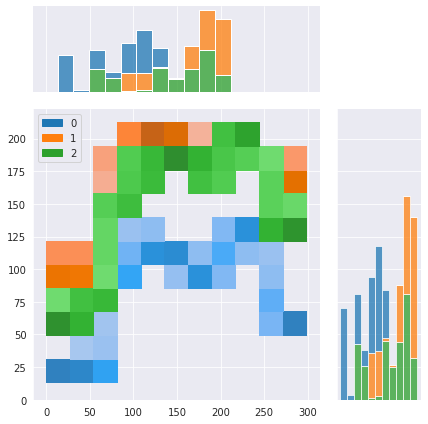

In [18]:

df_concat = pd.DataFrame(rust_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

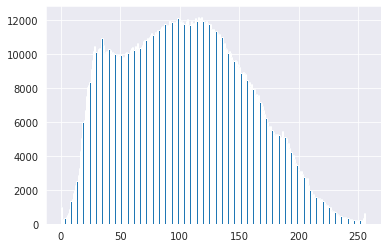

In [27]:
plt.hist(rust_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

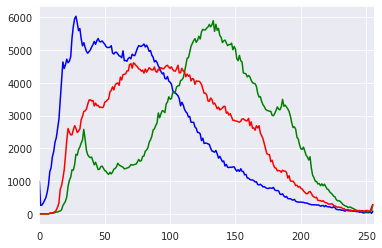

In [28]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([rust_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

# Complex concatenated images 
* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

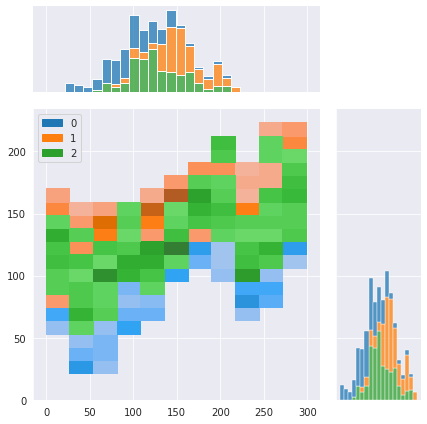

In [19]:

df_concat = pd.DataFrame(complex_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

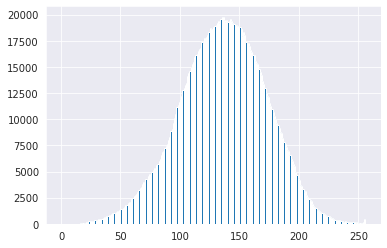

In [29]:
plt.hist(complex_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

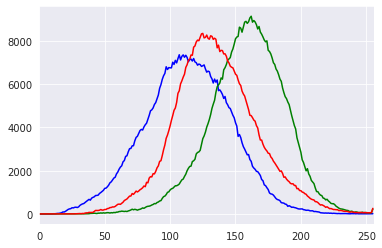

In [30]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([complex_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


# Powdery Mildew concatenated images 

They look like they are going to grey and you can see that in their visual plots where colors converge to the middle. 

* jointplot of where the colors overlap 
* plotted by bins of RGB [0 to 255]
* plotted by distribution of Red Green and Blue 

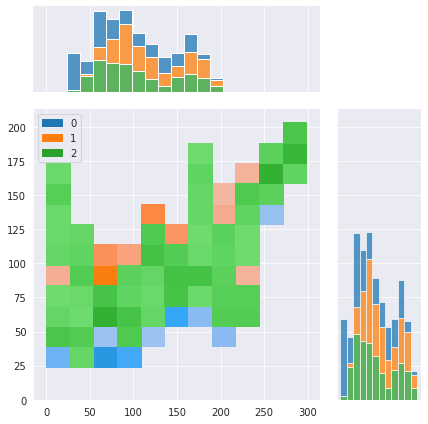

In [20]:

df_concat = pd.DataFrame(powdery_mildew_concatenated_images[0])

sns.set_palette(
    palette="tab10",
    n_colors=3,
)

sns.set_style("darkgrid")

g = sns.jointplot(data=df_concat, kind="hist",  palette='tab10', 
                 ratio=3, marginal_kws={'multiple': 'stack'})
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

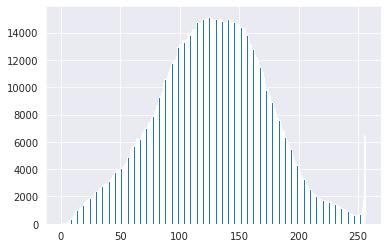

In [31]:
plt.hist(powdery_mildew_concatenated_images.ravel(), bins = 256, range = [0,256])
plt.show()

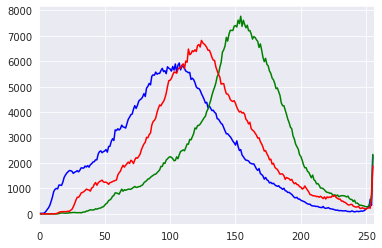

In [32]:
# Display the histogram of R, G, B channel  for concatenated images
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([powdery_mildew_concatenated_images],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()